In [1]:
 pip install keras --user

Note: you may need to restart the kernel to use updated packages.


## 1

In [2]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=1000,
                n_features=10,
                n_informative=6,
                noise=10,random_state=42)

## 2

In [3]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.127909,0.494706,0.044359,-1.745707,-0.336553,-0.409308,-1.127496,0.383435,1.005925,0.154494
1,-0.496651,1.269613,-1.277437,1.156582,0.406094,1.357620,0.418515,-1.245151,-0.143582,0.923045
2,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
3,2.121631,0.729773,0.314445,-0.358958,-2.025040,0.043031,-2.065303,-0.931002,0.686858,-0.283152
4,-0.123729,-0.856498,-0.993863,0.420192,-1.184031,-1.264498,-0.382817,0.097670,-1.793106,-0.397680


In [4]:
Y = pd.DataFrame(Y)
Y.columns = ["target"]
Y.head()

,target
0,-26.258227
1,40.763331
2,35.184904
3,9.185398
4,-117.149738


## 3

In [5]:
X.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [6]:
Y.isna().sum()

target    0
dtype: int64

## 4

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=25)

In [8]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.127909,0.494706,0.044359,-1.745707,-0.336553,-0.409308,-1.127496,0.383435,1.005925,0.154494
1,-0.496651,1.269613,-1.277437,1.156582,0.406094,1.357620,0.418515,-1.245151,-0.143582,0.923045
2,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
3,2.121631,0.729773,0.314445,-0.358958,-2.025040,0.043031,-2.065303,-0.931002,0.686858,-0.283152
4,-0.123729,-0.856498,-0.993863,0.420192,-1.184031,-1.264498,-0.382817,0.097670,-1.793106,-0.397680


## 5

In [9]:
 # X columns has only continuous columns so, Preprocessing of contiuous columns

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(ss.fit_transform(xtest),columns=xtest.columns)

In [11]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.301151,0.063294,-0.021172,-0.228569,1.942247,-0.337944,0.940063,-0.587386,-2.005553,-0.765923
1,0.190968,1.196024,2.062613,-1.499253,0.579252,-0.770175,-0.424001,1.047970,0.203532,1.594548
2,-0.485714,0.493323,0.797727,-0.970912,-1.923731,1.053699,0.386083,0.563022,2.670675,0.007477
3,-0.199311,0.892389,0.823333,-0.633989,0.681549,-0.711567,-1.182456,-2.768972,-0.884396,0.432836
4,-1.092778,0.062773,1.186031,-0.006818,0.665493,0.681092,0.942641,-0.236594,-0.399095,-1.102488


In [12]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.410340,-0.381121,2.575868,-0.624718,1.234383,0.589884,0.574344,1.053072,1.899133,0.542752
1,-1.831218,0.286785,1.104538,0.583778,0.182438,0.334448,0.598530,1.503112,1.374833,1.216932
2,1.843115,-0.040681,-0.185748,1.512950,-0.587682,1.267185,2.099863,0.349121,-0.279194,-0.138590
3,-0.156887,0.471257,0.575615,1.545649,0.299520,-1.558874,0.368834,0.357975,-2.434131,-0.500772
4,-1.232713,-0.879252,0.490576,0.212979,-1.228174,0.767225,1.172023,0.554536,0.277838,0.426920


In [13]:
xtrain.shape

(800, 10)

In [14]:
xtest.shape

(200, 10)

In [15]:
ytrain.shape

(800, 1)

In [16]:
ytest.shape

(200, 1)

## 6

## Start building Neural Network

In [17]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense

In [18]:
model =  Sequential()
model.add(Dense(64,input_dim =xtrain.shape[1],activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="linear"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 7

In [20]:
model.compile(loss="mae",optimizer = "adam")

In [21]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 54.5704 - val_loss: 61.9819
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 54.1834 - val_loss: 61.4863
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 53.6351 - val_loss: 60.7038
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 52.7924 - val_loss: 59.4935
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 51.4662 - val_loss: 57.6504
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 49.3791 - val_loss: 54.8194
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 46.2615 - val_loss: 50.5691
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 41.6906 - val_loss: 44.5823
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 35.5247 - val_loss: 36.7201
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 27.5165 - val_lo

## 8

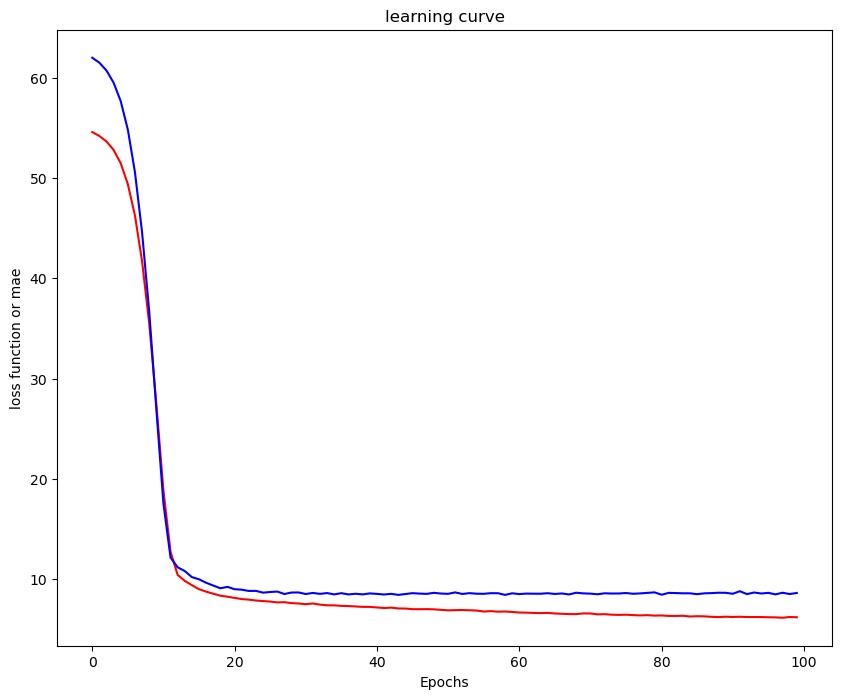

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(hist.history["loss"],c="red")
plt.plot(hist.history["val_loss"],c="blue")
plt.xlabel("Epochs")
plt.ylabel("loss function or mae")
plt.title("learning curve")
plt.show()

## 9

In [23]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [25]:
tr_pred[0:5]

array([[-49.428017],
       [ 29.220667],
       [ 95.85954 ],
       [-51.337753],
       [ 77.01687 ]], dtype=float32)

In [26]:
ts_pred[0:5]

array([[129.25645 ],
       [ 83.251076],
       [ 87.70534 ],
       [-67.32746 ],
       [ 60.330566]], dtype=float32)

In [28]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 1ms/step - loss: 6.5882


6.588247299194336

## 10

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
tr_mae =mean_absolute_error(ytrain,tr_pred)
tr_mse =mean_squared_error(ytrain,tr_pred)
print("training_mae:",round(tr_mae,2))
print("training_mse:" ,round(tr_mse,2))

training_mae: 6.59
training_mse: 79.99


In [30]:
ts_mae =mean_absolute_error(ytest,ts_pred)
ts_mse =mean_squared_error(ytest,ts_pred)
print("testing_mae:",round(ts_mae,2))
print("testing_mse:" ,round(ts_mse,2))

testing_mae: 10.34
testing_mse: 169.82
